In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans


# Exploratory Data Analysis (EDA)

In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_test.csv')

In [4]:
y_train = y_train.values.reshape(-1, )
y_test = y_test.values.reshape(-1, )

## Decision Tree

In [5]:
decisiontree = DecisionTreeClassifier(random_state=0,  class_weight= "balanced")
decisiontree.fit(X_train, y_train)
joblib.dump(decisiontree, '/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_cost-sensitive.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_cost-sensitive.joblib']

In [6]:
y_pred = decisiontree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6046696,    2901],
       [     30,       0]])

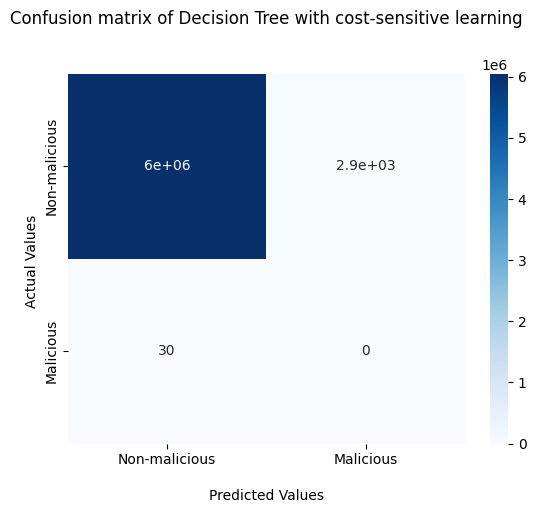

In [9]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of Decision Tree with cost-sensitive learning\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD Classifier

In [10]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3, class_weight= "balanced")
sgd.fit(X_train, y_train)
joblib.dump(sgd, '/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_cost-sensitive.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_cost-sensitive.joblib']

In [11]:
y_pred = sgd.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[5283488,  766109],
       [     10,      20]])

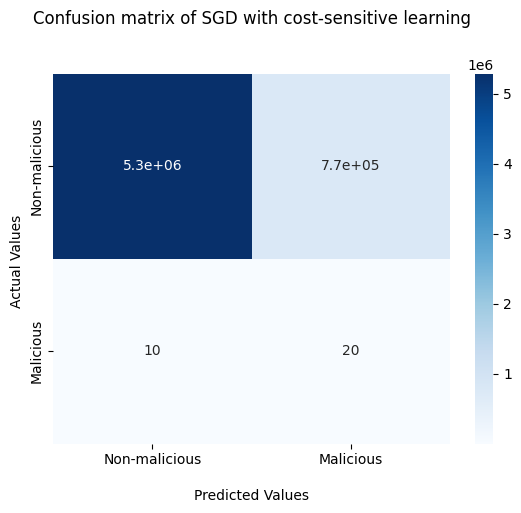

In [12]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of SGD with cost-sensitive learning\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()